Epoch 1/5
469/469 [==============================] - 6s 13ms/step - loss: 0.6918 - val_loss: 0.6910
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6901 - val_loss: 0.6891
Epoch 3/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6877 - val_loss: 0.6863
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6844 - val_loss: 0.6823
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 0.6793 - val_loss: 0.6761


(-0.5, 27.5, 27.5, -0.5)

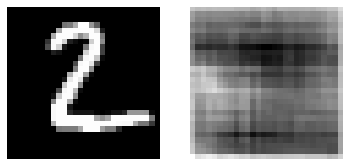

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt

input_img = Input(shape=(28,28,1))
#encoding
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

 
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

#decoding
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)


x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

decoded_imgs = autoencoder.predict(x_test)

img_size = 28
plt.subplot(1,2,1)
plt.imshow(x_test[1].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(decoded_imgs[1].reshape(img_size,img_size))
plt.axis('off')